In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [19]:
fdiry = file.path(FD_RES, "results_v2", "KS91_K562_ASTARRseq", "coverage_astarrseq_peak_macs_input", "summary")
fname = "KS91_K562_ASTARRseq_summary.unstranded.tsv"
fpath = file.path(fdiry, fname)
dat_cpm = read_tsv(fpath) %>% mutate(Peak = paste(Chrom, Start, End, sep="_"))

fname = "wgs_summary_cpm.tsv"
fpath = file.path(fdiry, fname)
dat_sum = read_tsv(fpath) %>% separate(col = Peak, into = c("Chrom", "Start", "End"), remove = FALSE)

Rows: 814 Columns: 6
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): Chrom, Group, Region
dbl (3): Start, End, Cpm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 246852 Columns: 3
── Column specification ──────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): Peak
dbl (2): Input, Output

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
head(dat_cpm)

Chrom,Start,End,Group,Region,Cpm,Peak
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
chr11,61792068,61793464,Input,FADS,12.9543276,chr11_61792068_61793464
chr11,61792068,61793464,Output,FADS,134.7986858,chr11_61792068_61793464
chr11,61800085,61801113,Input,FADS,4.4864783,chr11_61800085_61801113
chr11,61800085,61801113,Output,FADS,135.6993319,chr11_61800085_61801113
chr11,61806630,61807154,Input,FADS,0.6572702,chr11_61806630_61807154
chr11,61806630,61807154,Output,FADS,2.7640533,chr11_61806630_61807154


In [21]:
head(dat_sum)

Peak,Chrom,Start,End,Input,Output
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr1_10015_10442,chr1,10015,10442,0.4863317,0.09736537
chr1_14253_14645,chr1,14253,14645,0.3152472,0.27902967
chr1_16015_16477,chr1,16015,16477,0.4361424,0.15900628
chr1_17237_17772,chr1,17237,17772,0.8007562,0.22194085
chr1_28903_29613,chr1,28903,29613,0.7629703,0.16679463
chr1_30803_31072,chr1,30803,31072,0.2774187,0.21678565


In [22]:
dat = dat_cpm
dat = dat %>% 
    tidyr::spread(Group, Cpm) %>%
    dplyr::mutate(log2FoldChange = log2(Output) - log2(Input)) %>%
    dplyr::filter(Region == "GATA1")
head(dat)

Chrom,Start,End,Region,Peak,Input,Output,log2FoldChange
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47796208,47796828,GATA1,chrX_47796208_47796828,0.7949314,9.904800,3.639226
chrX,47806139,47808167,GATA1,chrX_47806139_47808167,1.6444201,14.429452,3.133366
chrX,47809119,47809445,GATA1,chrX_47809119_47809445,0.2519672,1.813228,2.847253
chrX,47814810,47815443,GATA1,chrX_47814810_47815443,0.7579963,3.931249,2.374725
chrX,47816459,47818070,GATA1,chrX_47816459_47818070,1.5055737,12.849629,3.093341
chrX,47836113,47837157,GATA1,chrX_47836113_47837157,6.9206893,133.943991,4.274570


Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


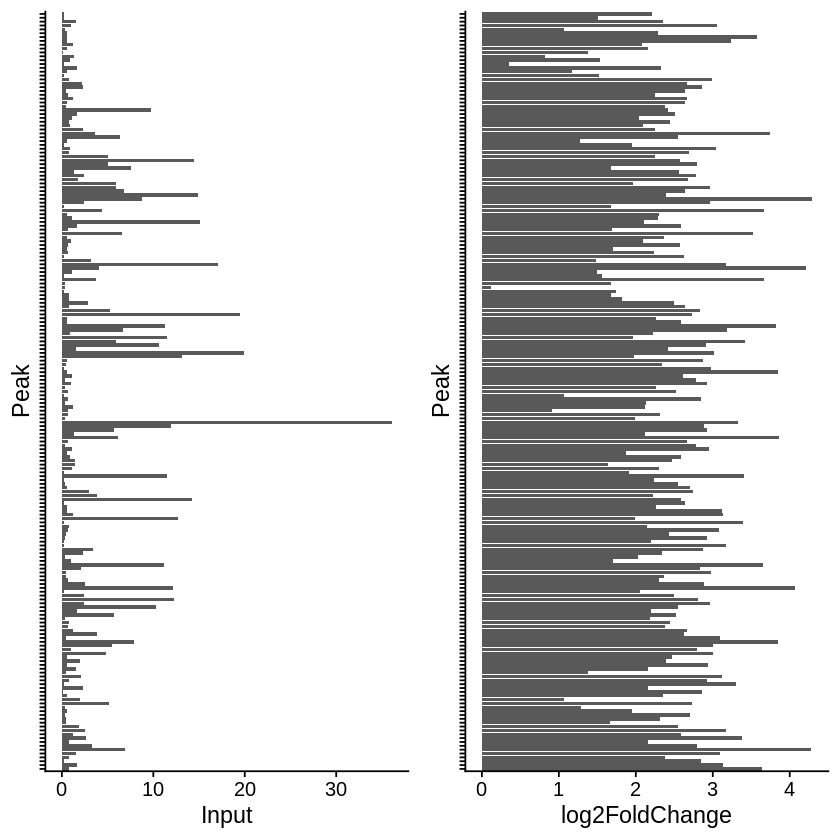

In [23]:
gp1 = ggplot(dat, aes(x=Input, y=Peak)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.y = element_blank())

gp2 = ggplot(dat, aes(x=log2FoldChange, y=Peak)) + 
    geom_histogram(stat="identity") + 
    theme_cowplot() + 
    theme(axis.text.y = element_blank())

plot_grid(gp1, gp2, nrow = 1, align = "h")

In [24]:
peaks = dat$Peak
tmp = dat_sum %>% dplyr::filter(Peak %in% peaks)
head(tmp)

Peak,Chrom,Start,End,Input,Output
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chrX_47796208_47796828,chrX,47796208,47796828,0.7949314,1.4643798
chrX_47806139_47808167,chrX,47806139,47808167,1.6444201,2.0038522
chrX_47809119_47809445,chrX,47809119,47809445,0.2519672,0.2137948
chrX_47814810_47815443,chrX,47814810,47815443,0.7579963,0.5323608
chrX_47816459_47818070,chrX,47816459,47818070,1.5055737,1.9887890
chrX_47836113_47837157,chrX,47836113,47837157,6.9206893,16.7769402
